In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [31]:
df = pd.read_csv('/content/student adaptibility .csv')

In [32]:
df.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,06-Mar,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,03-Jan,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,03-Jan,No,Mobile,Moderate
3,Girl,15-Nov,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,03-Jan,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,15-Nov,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,03-Jan,No,Mobile,Low
6,Boy,15-Nov,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,15-Nov,School,Non Government,No,Yes,Low,Mid,Wifi,4G,03-Jan,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,03-Jan,No,Mobile,Low
9,Boy,NaN,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,03-Jan,No,Mobile,Moderate


In [33]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [34]:
df.isnull().sum()

Gender                  9
Age                    13
Education Level        14
Institution Type       18
IT Student             12
Location               15
Load-shedding          14
Financial Condition    15
Internet Type          16
Network Type           15
Class Duration         15
Self Lms               15
Device                 17
Adaptivity Level       17
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1196 non-null   object
 1   Age                  1192 non-null   object
 2   Education Level      1191 non-null   object
 3   Institution Type     1187 non-null   object
 4   IT Student           1193 non-null   object
 5   Location             1190 non-null   object
 6   Load-shedding        1191 non-null   object
 7   Financial Condition  1190 non-null   object
 8   Internet Type        1189 non-null   object
 9   Network Type         1190 non-null   object
 10  Class Duration       1190 non-null   object
 11  Self Lms             1190 non-null   object
 12  Device               1188 non-null   object
 13  Adaptivity Level     1188 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [36]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1196,1192,1191,1187,1193,1190,1191,1190,1189,1190,1190,1190,1188,1188
unique,2,7,3,2,2,2,2,3,2,3,3,3,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,03-Jan,No,Mobile,Moderate
freq,657,370,525,808,893,925,994,867,685,765,832,982,1002,615


In [37]:
df.shape

(1205, 14)

In [38]:
df.dropna(inplace=True)
df.drop(columns=['Age', 'Class Duration'], inplace=True)
df.head()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,No,Tab,Moderate
1,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,Yes,Mobile,Moderate
2,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,No,Mobile,Moderate
3,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,No,Mobile,Moderate
4,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,No,Mobile,Low


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142 entries, 0 to 1194
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1142 non-null   object
 1   Education Level      1142 non-null   object
 2   Institution Type     1142 non-null   object
 3   IT Student           1142 non-null   object
 4   Location             1142 non-null   object
 5   Load-shedding        1142 non-null   object
 6   Financial Condition  1142 non-null   object
 7   Internet Type        1142 non-null   object
 8   Network Type         1142 non-null   object
 9   Self Lms             1142 non-null   object
 10  Device               1142 non-null   object
 11  Adaptivity Level     1142 non-null   object
dtypes: object(12)
memory usage: 116.0+ KB


In [40]:
df_encoded = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df_encoded.head()

,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,Gender_Boy,Gender_Girl
0,University,Non Government,No,Yes,Low,Mid,Wifi,4G,No,Tab,Moderate,1,0
1,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,Yes,Mobile,Moderate,0,1
2,College,Government,No,Yes,Low,Mid,Wifi,4G,No,Mobile,Moderate,0,1
3,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,No,Mobile,Moderate,0,1
4,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,No,Mobile,Low,0,1


In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = preprocessing.LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,Gender_Boy,Gender_Girl
0,2,1,0,1,1,0,1,2,0,2,2,1,0
1,2,1,0,1,0,0,0,2,1,1,2,0,1
2,0,0,0,1,1,0,1,2,0,1,2,0,1
3,1,1,0,1,1,0,0,2,0,1,2,0,1
4,1,1,0,1,1,1,0,1,0,1,1,0,1


In [43]:
df_encoded.describe()

,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,Gender_Boy,Gender_Girl
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,1.196147,0.680385,0.245184,0.774081,0.830998,0.341506,0.424694,1.624343,0.173380,0.894921,1.433450,0.548161,0.451839
std,0.722775,0.466532,0.430385,0.418370,0.374918,0.607298,0.494513,0.516038,0.378741,0.383021,0.643475,0.497893,0.497893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


In [42]:
df_corr = df_encoded.corr()
df_corr

,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level,Gender_Boy,Gender_Girl
Education Level,1.000000,0.113306,0.414385,0.053927,0.009238,0.084864,0.080596,-0.046650,0.314279,-0.264228,-0.035979,0.195350,-0.195350
Institution Type,0.113306,1.000000,0.102541,0.312251,-0.018468,0.011290,0.064631,-0.062305,0.085729,-0.094924,0.155342,-0.120442,0.120442
IT Student,0.414385,0.102541,1.000000,-0.003614,-0.188363,-0.015497,0.119774,-0.141336,0.454081,-0.380552,0.043147,0.218875,-0.218875
Location,0.053927,0.312251,-0.003614,1.000000,0.248072,0.059016,0.231173,0.178945,-0.051262,-0.060766,0.100369,0.027035,-0.027035
Load-shedding,0.009238,-0.018468,-0.188363,0.248072,1.000000,-0.000344,-0.014343,0.156276,-0.176138,0.053218,0.038711,-0.057303,0.057303
Financial Condition,0.084864,0.011290,-0.015497,0.059016,-0.000344,1.000000,-0.010595,-0.018161,-0.059512,-0.030215,-0.269232,0.023818,-0.023818
Internet Type,0.080596,0.064631,0.119774,0.231173,-0.014343,-0.010595,1.000000,0.340673,0.069774,-0.240782,-0.077734,0.018303,-0.018303
Network Type,-0.046650,-0.062305,-0.141336,0.178945,0.156276,-0.018161,0.340673,1.000000,-0.209056,-0.062427,0.015705,0.034661,-0.034661
Self Lms,0.314279,0.085729,0.454081,-0.051262,-0.176138,-0.059512,0.069774,-0.209056,1.000000,-0.194504,0.022213,0.127644,-0.127644
Device,-0.264228,-0.094924,-0.380552,-0.060766,0.053218,-0.030215,-0.240782,-0.062427,-0.194504,1.000000,0.064058,-0.129695,0.129695


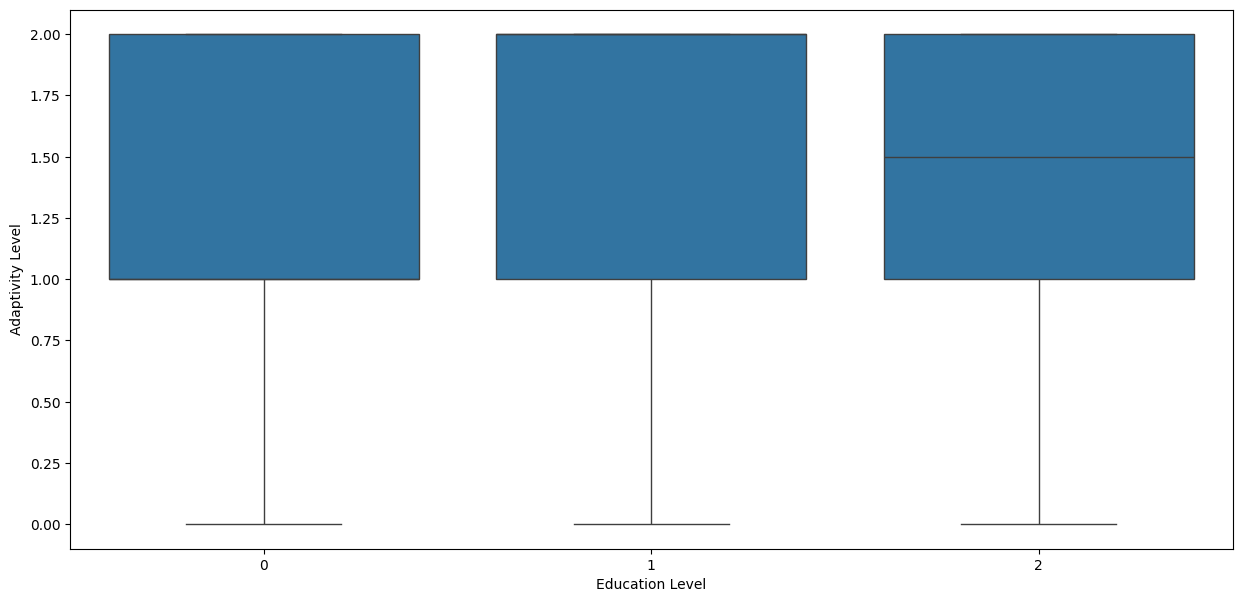

In [44]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Education Level', y='Adaptivity Level', data=df_encoded)
plt.show()

In [45]:
print(df_corr.shape)

(13, 13)


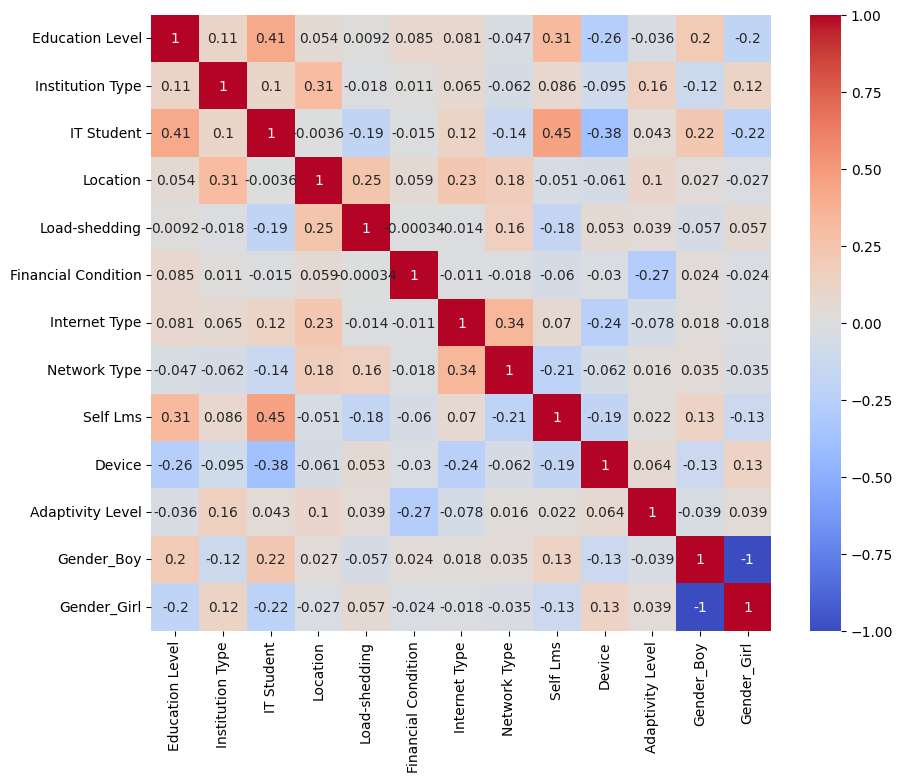

In [70]:
fig, ax = plt.subplots(figsize=(10,8 ))
sns.heatmap(df_corr, cmap = "coolwarm", annot=True)
plt.show()

In [71]:
X = df_encoded.drop(columns=['Adaptivity Level'])
y = df_encoded['Adaptivity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 799
Testing set size: 343


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)

In [62]:
scores = accuracy_score(y_test, y_pred)
print('scores:', scores)

scores: 0.6180758017492711


In [66]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5)

print('Cross-validation scores:', scores)

print('Average cross-validation score:', scores.mean())

Cross-validation scores: [0.63755459 0.57641921 0.60964912 0.60964912 0.64035088]
Average cross-validation score: 0.614724584386731
